In [1]:
# Stochastic Gradient Descent vs Batch Gradient Descent vs Mini Batch Gradient Descent PRACTICE_1

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from matplotlib import pyplot as plt
import random

In [3]:
df = pd.read_csv("homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [4]:
X = df.drop('price', axis='columns')
y = df.price

In [5]:
X.sample(2)

,area,bedrooms
3,1521,3
12,1000,2


In [6]:
y.sample(3)

1     120.0
3      75.0
16     48.0
Name: price, dtype: float64

In [7]:
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X)
y_scaler = scaler.fit_transform(y.values.reshape(df.shape[0], 1))

In [8]:
X_scaler[:3]

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ]])

In [47]:
y_scaler[:3]

array([[0.05237037],
       [0.65185185],
       [0.22222222]])

# FOR STOCHASTIC GRADIENT DESCENT

In [42]:
def gradientDescentSGD(X, y_true):
    W = np.ones(X.shape[1])
    bias = 0
    n = len(X)
    learning_rate = 0.01
    
    cost_ = []
    epoch_ = []
    
    for i in range(500):    
        y_pred = X.dot(W) + bias
        
        dw = -(2/n)*(X.T.dot(y_true - y_pred))
        db = -(2/n)*np.mean(y_pred-y_true)
        
        cost = np.mean(np.square(y_pred-y_true))
        
        W = W - learning_rate*dw
        bias = bias - learning_rate*db
        
        if i%10 == 0:
            cost_.append(cost)
            epoch_.append(i)
    
    return cost_, epoch_
    
cost_, epoch_ = gradientDescentSGD(X_scaler, y_scaler.reshape(y_scaler.shape[0]))

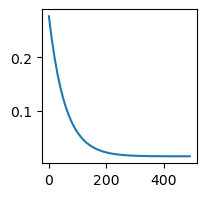

In [43]:
plt.figure(figsize=(2, 2))
plt.plot(epoch_, cost_)

# FOR BATCH GRADIENT DESCENT

In [58]:
def gradientDescentBatch(X, y_true):
    W = np.ones(X.shape[1])
    bias = 0
    n = len(X)
    learning_rate = 0.01
    
    cost_ = []
    epoch_ = []
    
    for i in range(500):
        X_ = X[random.randint(0, n-1)]
        y_true_ = y_true[random.randint(0, n-1)]
        
        y_pred = X_.dot(W) + bias
        
        dw = -(2/n)*(X_.T.dot(y_true_ - y_pred))
        db = -(2/n)*np.mean(y_pred-y_true_)
        
        cost = np.mean(np.square(y_pred-y_true_))
        
        W = W - learning_rate*dw
        bias = bias - learning_rate*db
        
        if i%10 == 0:
            cost_.append(cost)
            epoch_.append(i)
    
    return cost_, epoch_
    
cost_, epoch_ = gradientDescentBatch(X_scaler, y_scaler.reshape(y_scaler.shape[0]))

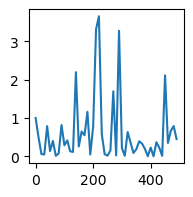

In [59]:
plt.figure(figsize=(2, 2))
plt.plot(epoch_, cost_)